# Natural language processing: an analysis of sentiment.

In this project I will investigate the basics of Natural Language Processing (NLP) and aim to predict whether a sample of tweets are either positive or negative. This will consist of combining machine learning principles with text. I will use mathematics and statistics to get the text in a format that algorithms can understand.

### Understanding the problem statement and business case.

- Natural language processors (NLP) work by converting words (text) into numbers.
- These numbers are then used to train an AI/ML model to make predictions.
- Predictions could be sentiment inferred from social media posts and product reviews.
- AI/ML-based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not.
- The process could be done automatically without having humans manually review thousands of tweets and customer reviews.
- In this case study, we will analysse thousands of Twitter tweets to predict people's sentiment.

For instance:<br>

<u><b>TWEET:</b></u> "Good morning everyone! Such a beautiful day!!" -> SENTIMENT ANALYSIS (NLP MODEL) -> <u><b>SENTIMENT</b></u>: POSITIVE (Label 0)
<p><u><b>TWEET:</b></u> "The food was awful and the waiters rude." -> SENTIMENT ANALYSIS (NLP MODEL) -> <u><b>SENTIMENT</b></u>: NEGATIVE (Label 1)

<p>The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a derogatory or negative sentiment associated with it. 
    
<b>Content</b><br>
Full tweet texts are provided with their labels for training data.<br>
Mentioned users' username have been redacted and replaced with @user. The user column will be dropped.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

## Load data, and Exploratory Data Analysis.
Let's check out some of the stats and plots.

Dataset details<br>
- label: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- ids: The id of the tweet 
- date: the date of the tweet 
- flag: If there is no query, then this value is NO_QUERY.
- user: the user that tweeted 
- text: the text of the tweet 

In [3]:
df_train=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=['label','id','date','flag','user','tweet'])

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   tweet   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df_train.info()
df_train.isnull().sum()
df_train.head()
df_train.tail()
df_train.groupby('label').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   tweet   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


id    date    flag    user   tweet
label                                        
0      800000  800000  800000  800000  800000
4      800000  800000  800000  800000  800000

In [6]:
df_train

label          id                          date      flag  \
0            0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1            0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2            0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3            0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4            0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...        ...         ...                           ...       ...   
1599995      4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996      4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997      4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998      4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999      4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                              tweet  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1          scotthamilton  is upset that he can't update his Facebook by ...  
2               mattycus  @Kenichan I dived many times for the ball. Man...  
3                ElleCTF    my whole body feels itchy and like its on fire   
4                 Karoli  @nationwideclass no, it's not behaving at all....  
...                  ...                                                ...  
1599995  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599996      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599997           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599998     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599999   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...  

[1600000 rows x 6 columns]

In [7]:
df_train.tail()

label          id                          date      flag  \
1599995      4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996      4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997      4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998      4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999      4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                              tweet  
1599995  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599996      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599997           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599998     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599999   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...

<AxesSubplot:xlabel='label', ylabel='count'>

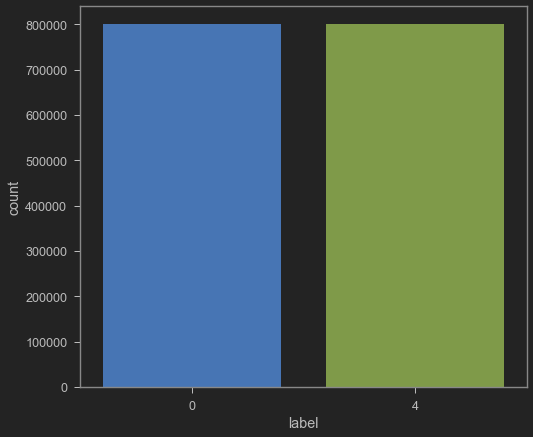

In [8]:
sns.countplot(data=df_train,x='label')

Ok, there are two labels - 0 and 4. For simplicity, I will rename these 0 and 1.

In [9]:
df_train.groupby('label').count()

id    date    flag    user   tweet
label                                        
0      800000  800000  800000  800000  800000
4      800000  800000  800000  800000  800000

In [10]:
def label_replacement(label):
    
    if label == 4:
        return 1
    else:
        return label

In [11]:
df_train['label']=df_train['label'].apply(label_replacement)

In [12]:
df_train.groupby('label').count()

id    date    flag    user   tweet
label                                        
0      800000  800000  800000  800000  800000
1      800000  800000  800000  800000  800000

Here I will drop features that I will not be using.

In [13]:
df_train=df_train.drop(['id','date','flag','user'],axis=1)

In [14]:
df_train.describe()

label
count  1600000.0
mean         0.5
std          0.5
min          0.0
25%          0.0
50%          0.5
75%          1.0
max          1.0

In [15]:
df_train.groupby('label').describe()

tweet                                        
        count  unique                        top freq
label                                                
0      800000  790185  isPlayer Has Died! Sorry   210
1      800000  793506              good morning   118

In [16]:
df_train=df_train.drop_duplicates(keep='last')

Part of data analysis involves understanding the data included in our features. This might involve investigating the idea of [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of sentiment analysis and machine learning in general.

Let's make a new column to detect how long the text messages are:

In [17]:
df_train['length']=df_train['tweet'].apply(len)

In [18]:
df_train.head()

label                                              tweet  length
0      0  @switchfoot http://twitpic.com/2y1zl - Awww, t...     115
1      0  is upset that he can't update his Facebook by ...     111
2      0  @Kenichan I dived many times for the ball. Man...      89
3      0    my whole body feels itchy and like its on fire       47
4      0  @nationwideclass no, it's not behaving at all....     111

### Data Visualisation:

Text(0.5, 0, 'Length of tweet')

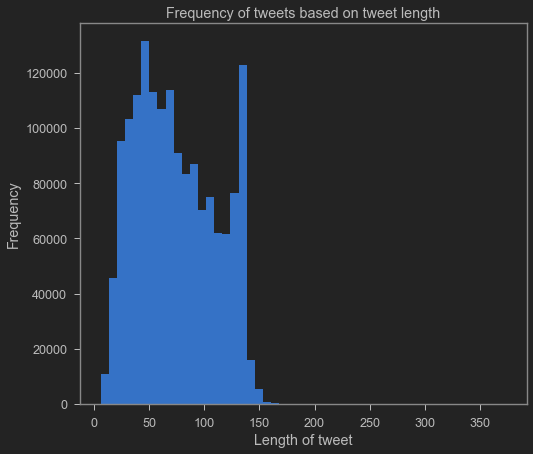

In [19]:
df_train['length'].plot(bins=50,kind='hist')
plt.title('Frequency of tweets based on tweet length')
plt.xlabel('Length of tweet')

In [20]:
df_train['length'].describe()

count    1.583691e+06
mean     7.447846e+01
std      3.621932e+01
min      6.000000e+00
25%      4.400000e+01
50%      7.000000e+01
75%      1.040000e+02
max      3.740000e+02
Name: length, dtype: float64

In [21]:
df_train.iloc[df_train['length'].idxmax]['tweet']

'Just finished the 98 name badges for the brides networking tomorrow! See everyone there '

Ok - it looks like there is a lot of data we will need to somehow clean. Let's do that before attempting to get more insights on this.

We can do this with regular expressions.

In [22]:
df_dev=df_train.iloc[:10]

In [23]:
df_dev

label                                              tweet  length
0      0  @switchfoot http://twitpic.com/2y1zl - Awww, t...     115
1      0  is upset that he can't update his Facebook by ...     111
2      0  @Kenichan I dived many times for the ball. Man...      89
3      0    my whole body feels itchy and like its on fire       47
4      0  @nationwideclass no, it's not behaving at all....     111
5      0                      @Kwesidei not the whole crew       29
6      0                                        Need a hug       11
7      0  @LOLTrish hey  long time no see! Yes.. Rains a...      99
8      0               @Tatiana_K nope they didn't have it       36
9      0                          @twittera que me muera ?       25

In [24]:
df_dev['tweet'].iloc[7]

"@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?"

In [25]:
df_dev['tweet'].str.replace('[^a-zA-Z0-9# ]', '',regex=True).iloc[7]

'LOLTrish hey  long time no see Yes Rains a bit only a bit  LOL  Im fine thanks  hows you '

That looks like it might do the trick!

In [26]:
df_dev['tweet'].str.replace('[^a-zA-Z0-9# ]', '',regex=True)

0    switchfoot httptwitpiccom2y1zl  Awww thats a b...
1    is upset that he cant update his Facebook by t...
2    Kenichan I dived many times for the ball Manag...
3      my whole body feels itchy and like its on fire 
4    nationwideclass no its not behaving at all im ...
5                         Kwesidei not the whole crew 
6                                          Need a hug 
7    LOLTrish hey  long time no see Yes Rains a bit...
8                    TatianaK nope they didnt have it 
9                              twittera que me muera  
Name: tweet, dtype: object

In [27]:
df_train['tweet']=df_train['tweet'].str.replace('[^a-zA-Z0-9# ]', '',regex=True)

At the same time - given that all personal information has been redacted and replaced with the word 'user', this tag will create a lot of noise. There might be other words that I can replace. Further exploration suggests that the word 'amp' is heavily used. I will similarly remove this, as well as stopwords and punctuation. 

For this I will create a function.

In [28]:
stop_words=stopwords.words('english')

In [29]:
stop_words=stopwords.words('english')
stop_words.extend(['user','amp'])

In [30]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
def clean_tweets(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a string of the cleaned text
    """
    nopunc=[i for i in text if i not in string.punctuation]
    nopunc=''.join(nopunc)
    return [i for i in nopunc.split() if i.lower() not in stop_words]

In [32]:
%time
df_train['clean']=df_train['tweet'].apply(clean_tweets)

Wall time: 0 ns


Let's try some visualisations again.

<AxesSubplot:ylabel='Frequency'>

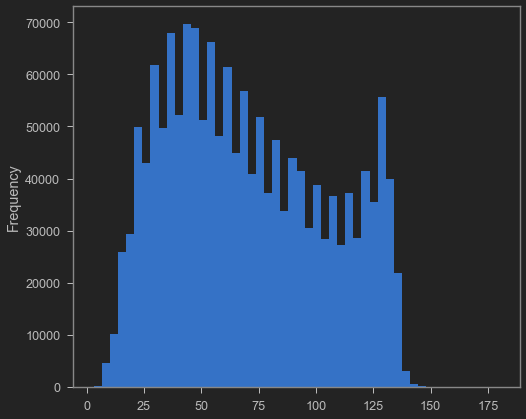

In [33]:
df_train['length'] = df_train['tweet'].apply(len)
df_train['length'].plot(bins=50,kind='hist')

Text(0.5, 0, 'Length of tweet')

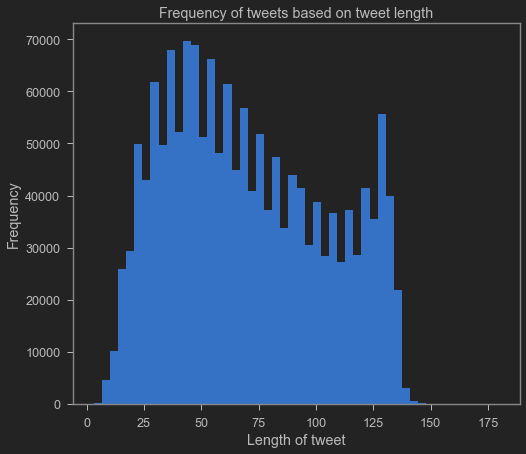

In [34]:
df_train['length'].plot(bins=50,kind='hist')
plt.title('Frequency of tweets based on tweet length')
plt.xlabel('Length of tweet')

In [35]:
df_train[df_train['length'] > 160]

label                                              tweet  length  \
402848       0  Raining steady in my neck of the woods quotquo...     163   
614583       0  so 30 update changes some of the text quotsugg...     162   
1181007      1  LyNn4 quotHumanquot quotRehabquot quotSex On F...     178   
1497655      1  BROOKE  quotfrustratedquot quotpissyquot quotg...     180   
1532313      1  curiousillusion Shoes VERY important And remem...     165   

                                                     clean  
402848   [Raining, steady, neck, woods, quotquotquotquo...  
614583   [30, update, changes, text, quotsuggestionsquo...  
1181007  [LyNn4, quotHumanquot, quotRehabquot, quotSex,...  
1497655  [BROOKE, quotfrustratedquot, quotpissyquot, qu...  
1532313  [curiousillusion, Shoes, important, remember, ...

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

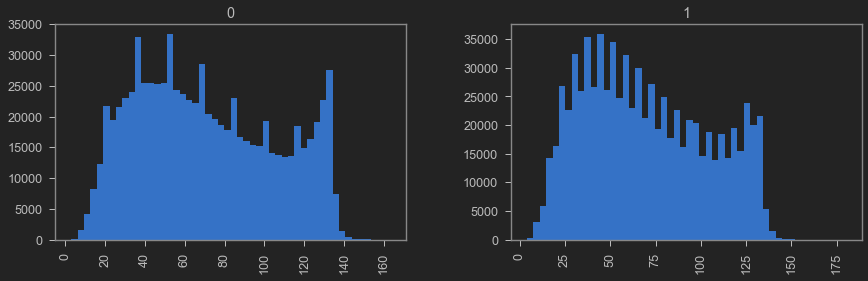

In [36]:
df_train.hist(column='length', by='label',bins=50,figsize=(14,4))

Great! The distribution seems to be fairly even.

<AxesSubplot:xlabel='label', ylabel='count'>

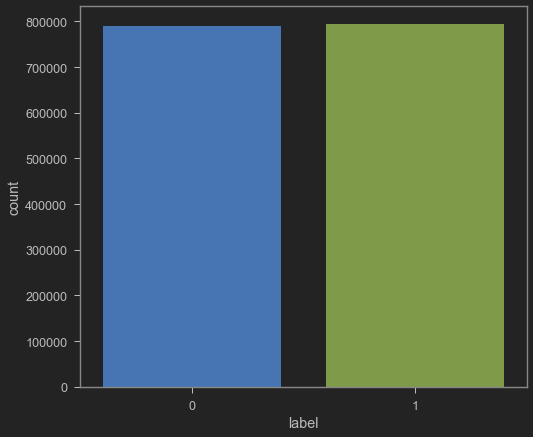

In [37]:
sns.countplot(data=df_train,x='label')

Let's create some wordclouds to visualise the most common words across both positive and negative datasets.

In [38]:
df_train['joined'] = df_train['clean'].apply(lambda x: ' '.join(x))

In [39]:
negative_tweets=''.join(df_train[df_train['label'] == 0]['joined'].to_list())

In [40]:
positive_tweets=''.join(df_train[df_train['label'] == 1]['joined'].to_list())

In [41]:
from PIL import Image

In [42]:
mask = np.array(Image.open('unnamed.jpg'))

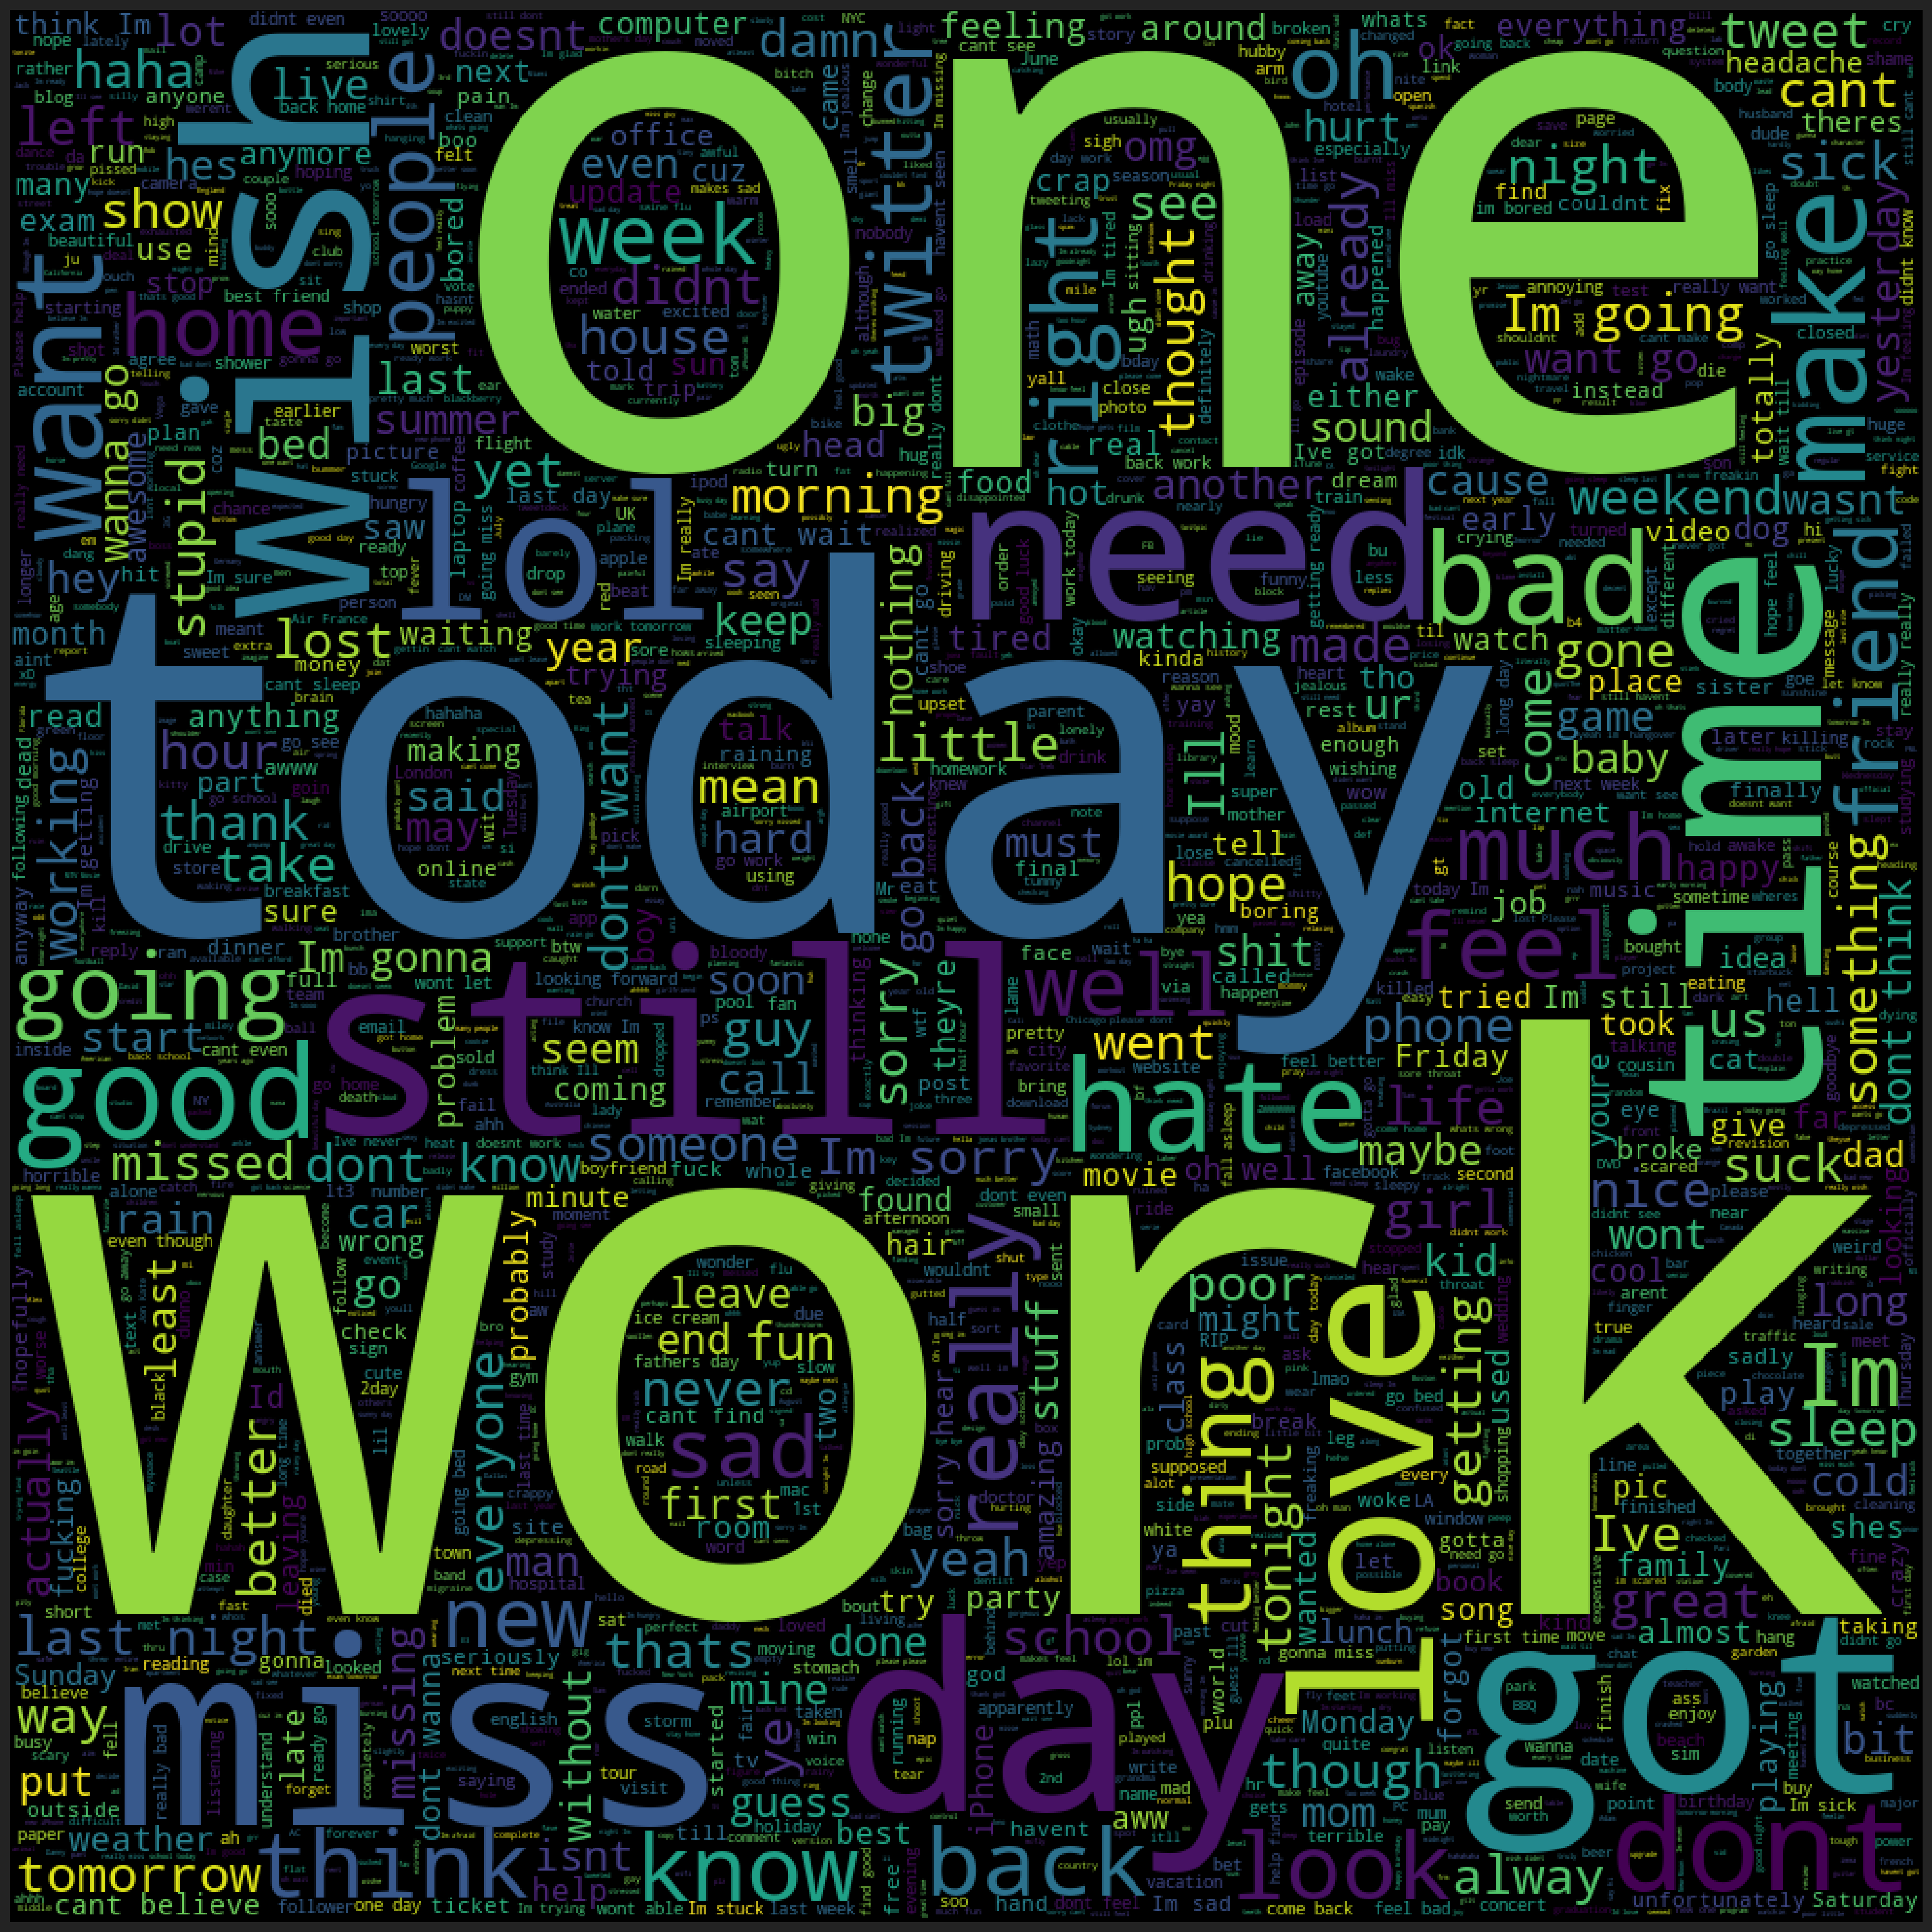

In [43]:
plt.figure(figsize=(20,20),dpi=300)
plt.imshow(WordCloud(width=1000, height=1000,max_words=2000).generate(negative_tweets),interpolation='antialiased')
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig('negative.png', dpi=300)
plt.show()

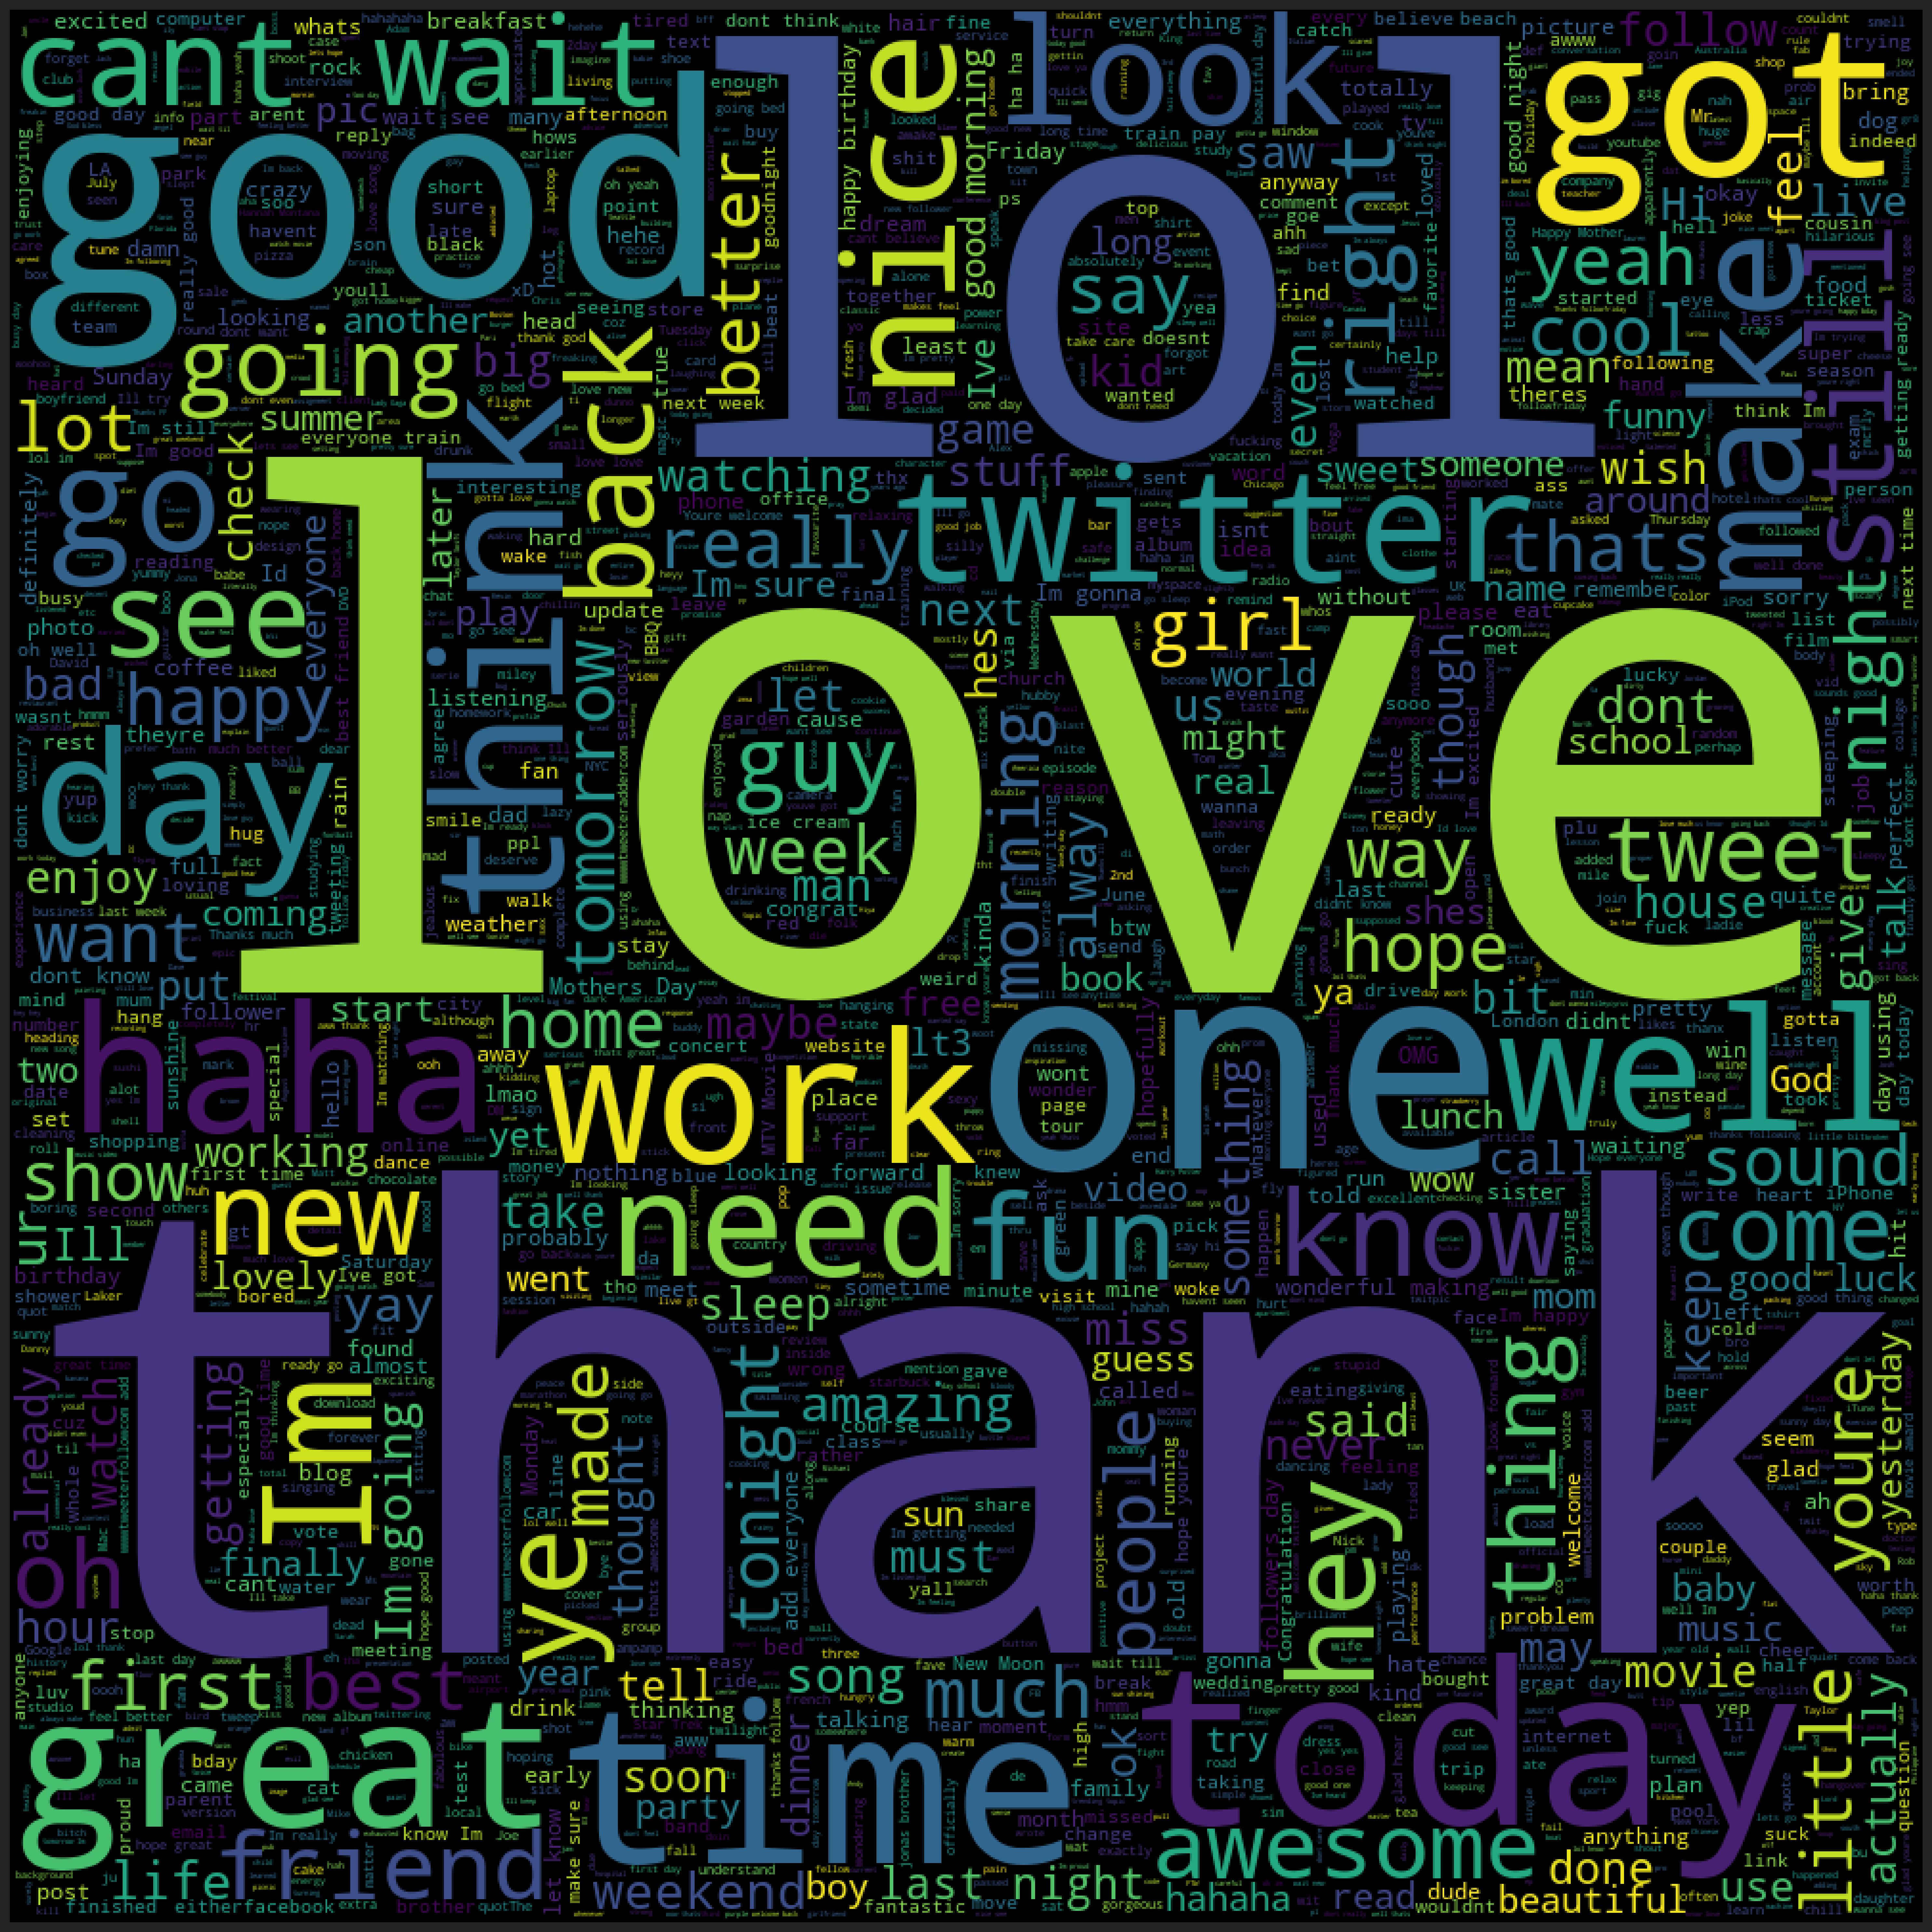

In [44]:
plt.figure(figsize=(20,20),dpi=300)
plt.imshow(WordCloud(width=1000, height=1000,max_words=2000).generate(positive_tweets),interpolation='antialiased')
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig('positive.png', dpi=300)
plt.show()

Based on this, we can definitely identify the main differences within the corpus.



In [45]:
df_train.groupby('label').count()

tweet  length   clean  joined
label                                
0      790185  790185  790185  790185
1      793506  793506  793506  793506

### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the twitter corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

Let's see how this works.

In [46]:
bow = CountVectorizer()

In [47]:
sample_data=['This is the first paper.','this paper is the second paper.','And this is the third one.','Is this the first paper?']

In [48]:
bow.fit(sample_data)

CountVectorizer()

In [49]:
transformed=bow.transform(sample_data)

In [50]:
print(bow.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [51]:
transformed.toarray()

array([[0, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 2, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 1, 0, 1]], dtype=int64)

In [52]:
pd.DataFrame(transformed.toarray(),columns=[bow.get_feature_names()])

and first is one paper second the third this
0   0     1  1   0     1      0   1     0    1
1   0     0  1   0     2      1   1     0    1
2   1     0  1   1     0      0   1     1    1
3   0     1  1   0     1      0   1     0    1

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **clean_tweets**  analyser to be our own previously defined function:

In [53]:
bow = CountVectorizer(analyzer=clean_tweets)
bow.fit(df_train['joined'])

CountVectorizer(analyzer=<function clean_tweets at 0x00000159952A2820>)

In [54]:
bow.fit(df_train['joined'])

CountVectorizer(analyzer=<function clean_tweets at 0x00000159952A2820>)

Let's take one of the tweets, and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [55]:
message42=df_train['joined'].iloc[42]
print(message42)

Sad sad sad dont know hate feeling wanna sleep still cant


Now let's see its vector representation:

In [56]:
bow42=bow.transform([message42])
bow42.shape

(1, 958768)

In [57]:
bow42.shape

(1, 958768)

In [58]:
print(bow42)

  (0, 255193)	1
  (0, 396662)	1
  (0, 452847)	1
  (0, 482278)	1
  (0, 520813)	1
  (0, 650381)	1
  (0, 815364)	2
  (0, 841916)	1
  (0, 858950)	1
  (0, 925282)	1


This means there are 10 unique words in message 42, and one of them is repeated - once we remove the common stop words. Let's look at a couple of these:

In [59]:
print(bow.get_feature_names()[815364])
print(bow.get_feature_names()[858950])

sad
still


Let's see the sentiment attached to this tweet:

In [60]:
df_train['label'].iloc[42]

0

Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire tweeter corpus in a large, sparse matrix:

In [61]:
tweet_bow = bow.transform(df_train['tweet'])

In [62]:
#Shape of sparce matrix:
tweet_bow.shape

(1583691, 958768)

In [63]:
#amount of non-zero occurences
tweet_bow.nnz

12165590

After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer()
tfidf.fit(tweet_bow)
tfidf42=tfidf.transform(bow42)

In [66]:
tfidf42=tfidf.transform(bow42)

In [67]:
print(tfidf42)

  (0, 925282)	0.2951940140818212
  (0, 858950)	0.25037294618231865
  (0, 841916)	0.26940996315282384
  (0, 815364)	0.5376688756509449
  (0, 650381)	0.234335634476154
  (0, 520813)	0.28880466751915695
  (0, 482278)	0.30566466497309563
  (0, 452847)	0.2247128087791132
  (0, 396662)	0.23090364232142122
  (0, 255193)	0.3910751620014823


There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline". 

Now let's transform the whole tweet corpus:

In [68]:
tweet_tfidf=tfidf.transform(tweet_bow)

In [69]:
tweet_tfidf.shape

(1583691, 958768)

## Training a model

With messages represented as vectors, we can finally train our positive/negative classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.

In [70]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
prediction_model=model.fit(tweet_tfidf,df_train['label'])
print('predicted:', prediction_model.predict(tfidf42)[0])
print('expected:',df_train['label'].iloc[42])

predicted: 0
expected: 0


In [71]:
model=MultinomialNB()

In [72]:
prediction_model=model.fit(tweet_tfidf,df_train['label'])

In [73]:
print('predicted:', prediction_model.predict(tfidf42)[0])
print('expected:',df_train['label'].iloc[42])

predicted: 0
expected: 0


That's great! Looks like our model is working - at least for that one message! Incidentally, without context and by just reading the words left in the tweet, I wouldn't have been able to tell whether it was positive or negative. I'm glad a computer can tell me!

## Model evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

We can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification). Check out the links for more detailed info on each of these metrics and the figure below:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
all_predictions = prediction_model.predict(tweet_tfidf)
print (classification_report(df_train['label'], all_predictions))
print(all_predictions)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85    790185
           1       0.87      0.82      0.84    793506

    accuracy                           0.85   1583691
   macro avg       0.85      0.85      0.85   1583691
weighted avg       0.85      0.85      0.85   1583691

[0 0 0 ... 1 1 1]


In [76]:
print (classification_report(df_train['label'], all_predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85    790185
           1       0.87      0.82      0.84    793506

    accuracy                           0.85   1583691
   macro avg       0.85      0.85      0.85   1583691
weighted avg       0.85      0.85      0.85   1583691



There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For this example, the application of this model will depend on whether mis-predicting positive as negative is more important than mis-predicting negative as positive.

In the above "evaluation",we evaluated accuracy on the same data we used for training. **You should never actually evaluate on the same dataset you train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

## Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.model_selection import train_test_split
X=df_train['joined']
y=df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [79]:
from sklearn.pipeline import Pipeline

In [80]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=clean_tweets)),
    ('tfidf',TfidfTransformer()),
    ('model',MultinomialNB())
])

In [81]:
pipeline.fit(X_train,y_train)
predictions=pipeline.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77    157487
           1       0.79      0.72      0.75    159252

    accuracy                           0.76    316739
   macro avg       0.77      0.76      0.76    316739
weighted avg       0.77      0.76      0.76    316739



In [82]:
print(confusion_matrix(y_test,predictions))

[[127144  30343]
 [ 44742 114510]]


<AxesSubplot:>

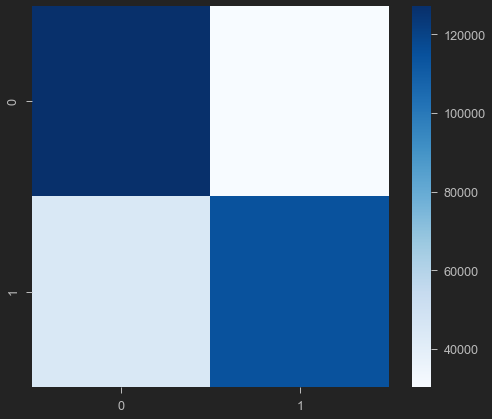

In [83]:
sns.heatmap(confusion_matrix(y_test,predictions),cmap='Blues')

That's not bad - a 77% accuracy score using scikit learn without delving into deep learning!

Now we have a classification report for our model on a true testing set! There is a lot more to Natural Language Processing than what we've covered here, and its vast expanse of topic could fill up several college courses! I encourage you to check out the resources below for more information on NLP!

## More Resources

Check out the links below for more info on Natural Language Processing:

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

## Part two will look at the same dataset using tensorflow and keras, to see if we can improve on the accuracy.
## Part three will investigate deploying the model to the web using a flask web form.

Stay tuned!

### Saving and loading the model:

In [85]:
import joblib

In [86]:
joblib.dump(pipeline,'pipeline.h5')

['pipeline.h5']

#### Predicting a single message.

In [87]:
tweet_model=joblib.load('pipeline.h5')

In [88]:
tweet_example_pos={'I love starting my days with a cup of coffee'}
tweet_example_neg={'I hate rainy days'}

In [89]:
def return_prediction(model,sample_json):
    
    # For larger data features, you should probably write a for loop
    # that builds out this array for you
    
    tweet_message = sample_json
    
    
    tweet = [tweet_message]
    
    
    
    classes = (['Negative','Positive'])
    
    class_ind = int(model.predict(tweet))

    
    return classes[class_ind]

In [90]:
return_prediction(tweet_model,tweet_example_pos)

'Positive'

In [91]:
return_prediction(tweet_model,tweet_example_neg)

'Negative'

## Wordcloud for Medium article

I've just learned how to create wordclouds, so I will be following a couple of collated tutorials in an attempt to create a wordcloud shaped like a twitter symbol.

In [92]:
mask = np.array(Image.open("twitter_mask.png"))

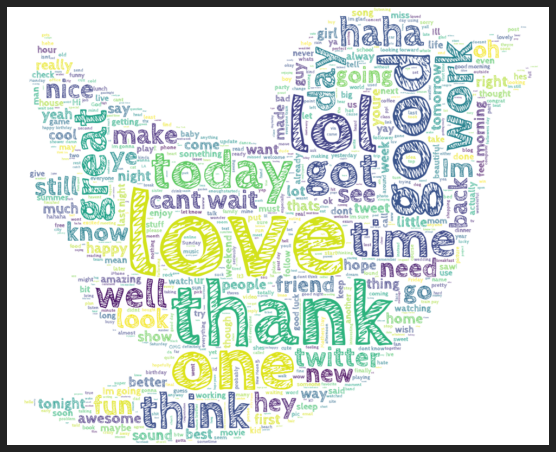

In [93]:
wc = WordCloud(background_color='white', mask=mask, mode='RGB', font_path='CabinSketch-Bold.ttf',
              width=1800, max_words=1000, height=1400)
wc.generate(positive_tweets)
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig('my_twitter_wordcloud_2.png', dpi=300)
plt.show()